# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

### Importing the data

In [26]:
# use these links to do so:
data=pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [27]:
data.shape

(7043, 21)

In [31]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Data Manipulation

In [32]:
target=data['Churn']
target.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [39]:
df=data.drop('Churn',axis=1)

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Data Visualization

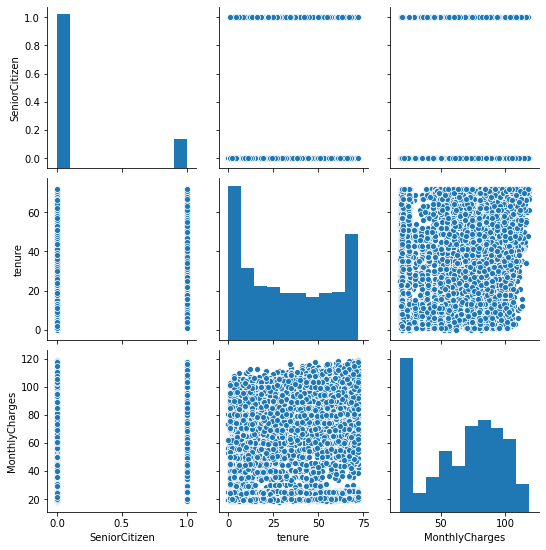

In [48]:
sns.pairplot(data)
plt.show()

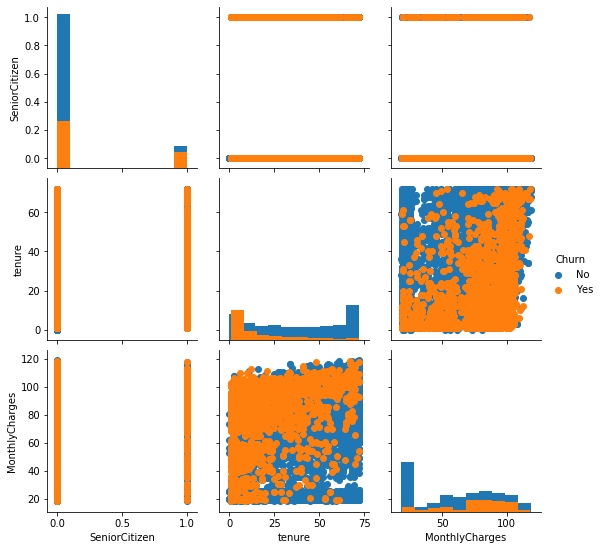

In [51]:
g = sns.PairGrid(data, hue="Churn")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.show()

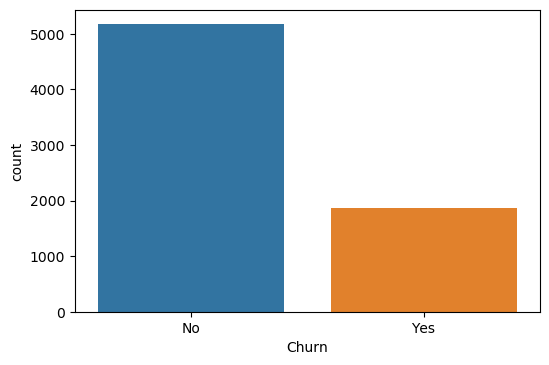

In [49]:
plt.figure(dpi=100)
sns.countplot(target)
plt.show()

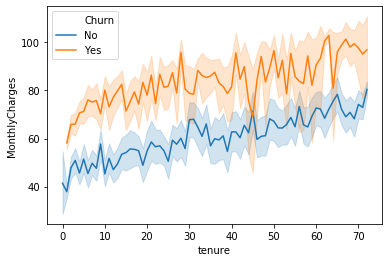

In [57]:
sns.lineplot(data['tenure'],data['MonthlyCharges'],hue=data['Churn'])
plt.show()

### From above data it is been observed mostly we have categorical features but there in between there are 2 features that can help us in getting our required implementation and that is:-
- Tenure
- Monthly Charges

In [64]:
features=data[['tenure','MonthlyCharges']]
features.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [1]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [67]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)
x_train.head()

,tenure,MonthlyCharges
4103,72,90.80
3287,19,100.95
555,56,68.75
2190,71,84.20
1163,12,89.75


In [70]:
y_train[:5]

4103     No
3287    Yes
555      No
2190     No
1163    Yes
Name: Churn, dtype: object

In [71]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred = model.predict(x_test)
pred[:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [73]:
y_test[:5]

3566     No
6591    Yes
6134     No
4533     No
1380     No
Name: Churn, dtype: object

### Model Evaluation

In [77]:
print(confusion_matrix(y_test,pred))

[[922 109]
 [209 169]]


In [78]:
print(accuracy_score(y_test,pred)*100)

77.43080198722498


In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1031
         Yes       0.61      0.45      0.52       378

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



### Final Conclusions

In [80]:
import pickle
fp=open('customer_churn.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [174]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('customer_churn.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Customer Churn')

canvas = tk.Canvas(root, height=350, width=800)

im = PIL.Image.open("ch.png")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

ten=tk.IntVar();
mnth_chr=tk.DoubleVar()

l=tk.Label(root,text='Customer Churn Prediction', bd=2,relief='sunken')
l.config(bg='#053e4c',fg='#FFFFFF', font=('Courier', 16, 'bold'))
l.place(relx=0.53, rely=0.02, relwidth=0.5, relheight=0.1, anchor='n')

l1 = tk.Label(root, text="Enter Tenure",bd=1,relief='sunken')
l1.config(bg='#FFFFFF', fg='#3E3E43', font=('Courier', 12, 'bold'))
l1.place(relx=0.28, rely=0.18, relwidth=0.16, relheight=0.07)

e1 = tk.Entry(root,textvariable=ten,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.44, rely=0.18, relwidth=0.07, relheight=0.07)

l2 = tk.Label(root, text="Enter Monthly Charges",bd=1,relief='sunken')
l2.config(bg='#FFFFFF', fg='#3E3E43', font=('Courier', 12, 'bold'))
l2.place(relx=0.28, rely=0.3, relwidth=0.27, relheight=0.07)

e2 = tk.Entry(root,textvariable=mnth_chr,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e2.place(relx=0.55, rely=0.3, relwidth=0.07, relheight=0.07)

b = tk.Button(root, text='Predict', command=lambda : predict())
b.config(bg='#eeeeee', fg='black', font=('Courier', 12, 'bold'),border=5)
b.place(relx=0.7, rely=0.3, relwidth=0.13, relheight=0.07)

def predict():
    t = ten.get()
    mc = mnth_chr.get()
    features = [ [ t, mc] ]
    m = model.predict(features)[0]
    if m=="Yes":
        text ="Customer's Churn is Yes."
    else:
        text ="Customer's Churn is No"
        
    label = tk.Label(root,text=text,relief='sunken')
    label.config(bg='#074d5e',fg='#FFFFFF',font=('Courier', 16))
    label.place(relx=0.35, rely=0.45, relwidth=0.4, relheight=0.065)


canvas.pack()
root.mainloop()

In [142]:
model.predict(features)[0]

'No'